# 1. How has price per piece changed across release years?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/lego_population.csv')

df['price_per_piece'] = df['price'] / df['pieces']

yearly_value = (
    df.dropna(subset=['price_per_piece'])
      .groupby('year')['price_per_piece']
      .mean()
      .reset_index()
)

plt.figure()
plt.plot(yearly_value['year'], yearly_value['price_per_piece'], marker='o')
plt.xlabel('Year')
plt.ylabel('Average Price per Piece')
plt.title('How LEGO Value Changes Over Time')
plt.show()


# 2. How has the average price of sets changed over production years? i.e., are newer sets more expensive (or have more pieces) than older ones?

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving lego_population.csv to lego_population.csv


In [ ]:
import pandas as pd

filename = list(uploaded.keys())[0]   # gets your file name automatically
df = pd.read_csv(filename)


In [ ]:
df_clean = df.dropna(subset=["price", "year"])
df_clean.head()

,item_number,set_name,theme,pieces,price,amazon_price,year,ages,pages,minifigures,packaging,weight,unique_pieces,size
0,41916,Extra Dots - Series 2,DOTS,109.0,3.99,3.44,2020,Ages_6+,NaN,NaN,Foil pack,NaN,6.0,Small
1,41908,Extra Dots - Series 1,DOTS,109.0,3.99,3.99,2020,Ages_6+,NaN,NaN,Foil pack,NaN,6.0,Small
2,11006,Creative Blue Bricks,Classic,52.0,4.99,4.93,2020,Ages_4+,37.0,NaN,Box,NaN,28.0,Small
3,11007,Creative Green Bricks,Classic,60.0,4.99,4.93,2020,Ages_4+,37.0,NaN,Box,NaN,36.0,Small
4,41901,Funky Animals Bracelet,DOTS,33.0,4.99,4.99,2020,Ages_6+,NaN,NaN,Foil pack,NaN,10.0,Small


In [ ]:
price_by_year = df_clean.groupby("year")["price"].mean().reset_index()
price_by_year.head()

,year,price
0,2018,42.882238
1,2019,48.435906
2,2020,47.727405


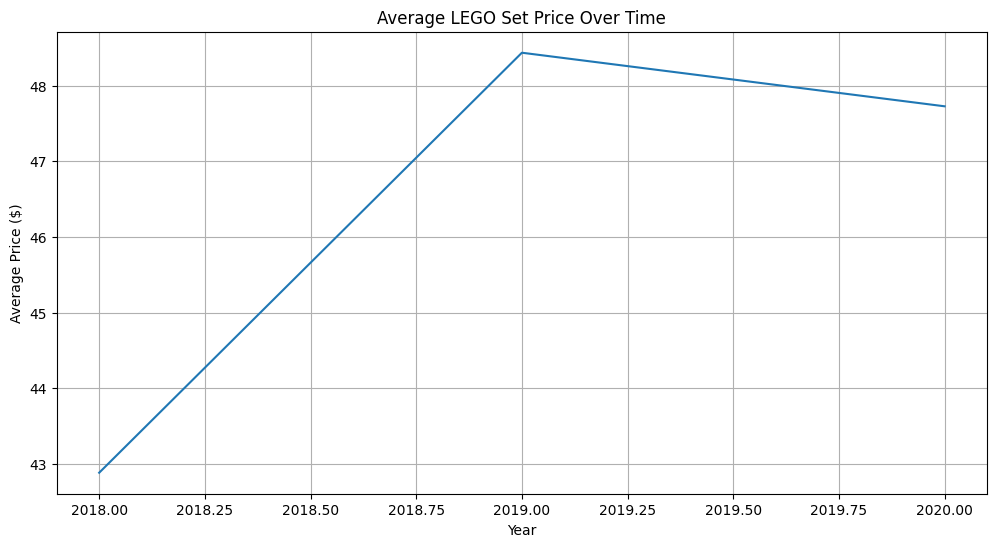

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(price_by_year["year"], price_by_year["price"])
plt.xlabel("Year")
plt.ylabel("Average Price ($)")
plt.title("Average LEGO Set Price Over Time")
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/lego_population.csv')

df['price_per_piece'] = df['price'] / df['pieces']

yearly_value = (
    df.dropna(subset=['price_per_piece'])
      .groupby('year')['price_per_piece']
      .mean()
      .reset_index()
)

plt.figure()
plt.plot(yearly_value['year'], yearly_value['price_per_piece'], marker='o')
plt.xlabel('Year')
plt.ylabel('Average Price per Piece')
plt.title('How LEGO Value Changes Over Time')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/lego_population.csv'

# 4. Do sets with more pieces cost less per piece?

In [ ]:
# Step 1: Upload the file (run this cell first)
from google.colab import files
uploaded = files.upload()  # Click "Choose Files" and select your lego_population.csv

Saving lego_population.csv to lego_population.csv


Original Dataset Shape: (1304, 14)

First 5 Rows:
   item_number                set_name    theme  pieces  price  amazon_price  \
0        41916   Extra Dots - Series 2     DOTS   109.0   3.99          3.44   
1        41908   Extra Dots - Series 1     DOTS   109.0   3.99          3.99   
2        11006    Creative Blue Bricks  Classic    52.0   4.99          4.93   
3        11007   Creative Green Bricks  Classic    60.0   4.99          4.93   
4        41901  Funky Animals Bracelet     DOTS    33.0   4.99          4.99   

   year     ages  pages  minifigures  packaging weight  unique_pieces   size  
0  2020  Ages_6+    NaN          NaN  Foil pack    NaN            6.0  Small  
1  2020  Ages_6+    NaN          NaN  Foil pack    NaN            6.0  Small  
2  2020  Ages_4+   37.0          NaN        Box    NaN           28.0  Small  
3  2020  Ages_4+   37.0          NaN        Box    NaN           36.0  Small  
4  2020  Ages_6+    NaN          NaN  Foil pack    NaN           10.0  Sma

ValueError: alpha (2.0) is outside 0-1 range

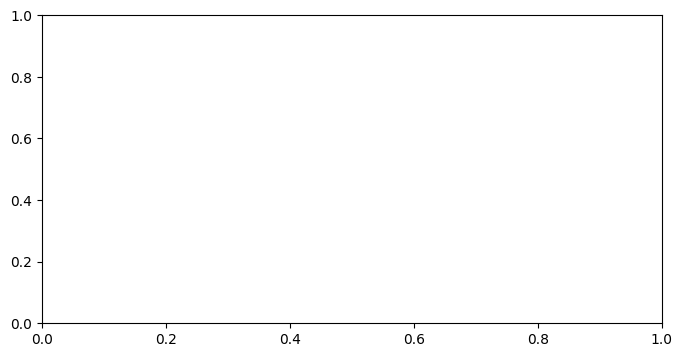

In [ ]:

# Step 2: Load & inspect the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get the uploaded filename (automatically detects the CSV)
filename = next(iter(uploaded.keys()))
df = pd.read_csv(filename)

# Inspect data
print("Original Dataset Shape:", df.shape)
print("\nFirst 5 Rows:")
print(df.head())

# Load dataset
lego = pd.read_csv("/content/lego_population.csv")

# Preview data
lego.head()

# Keep only relevant columns for this question
df = lego[['item_number', 'set_name', 'theme', 'pieces', 'price', 'year', 'size']].copy()

# Remove missing values for pieces and price
df = df.dropna(subset=['pieces', 'price'])

# Create price-per-piece column
df['price_per_piece'] = df['price'] / df['pieces']

# --- SUMMARY STATS ---
summary = df[['pieces', 'price', 'price_per_piece']].describe()
summary

# --- CORRELATION ---
corr = df['pieces'].corr(df['price_per_piece'])
corr

# --- SCATTERPLOT ---
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='pieces', y='price_per_piece', alpha=2.0)
plt.title("Do LEGO Sets with More Pieces Cost Less Per Piece?")
plt.xlabel("Number of Pieces")
plt.ylabel("Price per Piece")
plt.show()

# --- TREND LINE ---
plt.figure(figsize=(8,4))
sns.regplot(data=df, x='pieces', y='price_per_piece', scatter_kws={'alpha':0.3})
plt.title("Trend: More Pieces → Lower Price Per Piece")
plt.xlabel("Number of Pieces")
plt.ylabel("Price per Piece")
plt.show()




### Alternative Visualization: Average Price per Piece by Piece Count Bins

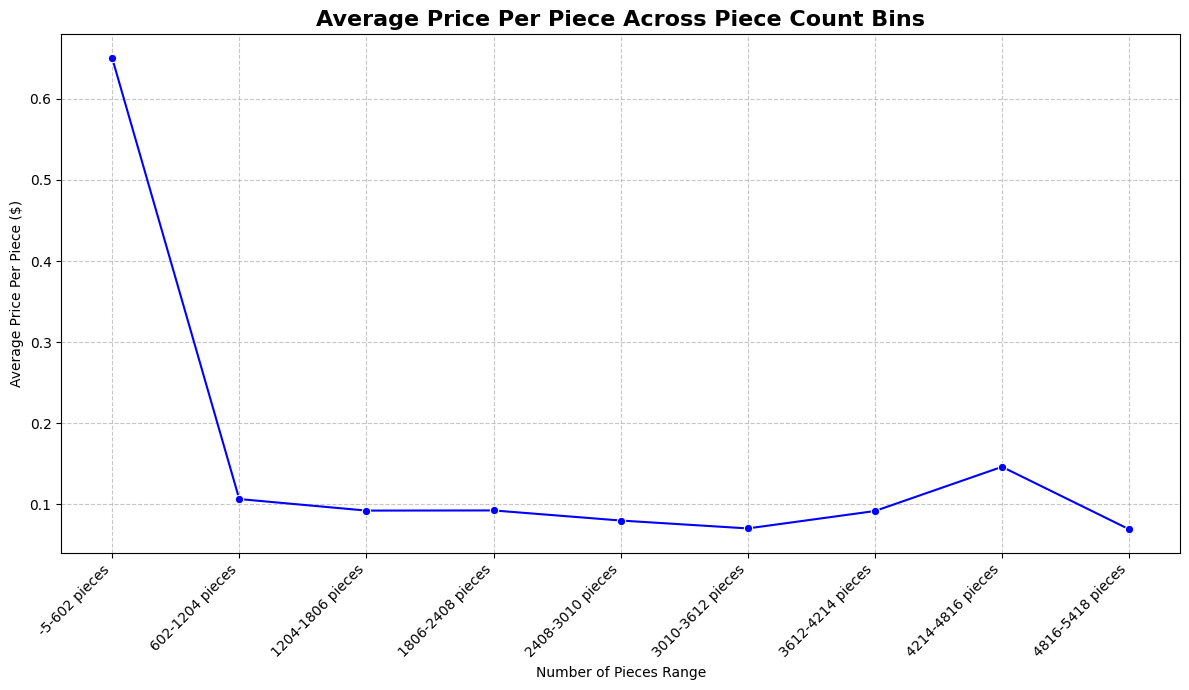

Interpretation: This line plot shows the average price per piece for sets falling into different piece count ranges. The general downward trend indicates that, on average, sets with more pieces tend to have a lower price per piece, confirming the observation from the scatter plot and summary statistics.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Re-create df_clean and price_per_piece for this plot
df_clean = df.dropna(subset=['pieces', 'price'])  # Remove missing values
df_clean = df_clean[(df_clean['pieces'] > 0) & (df_clean['price'] > 0)]  # Remove invalid entries
df_clean['price_per_piece'] = df_clean['price'] / df_clean['pieces']  # Calculate price per piece

# Create bins for 'pieces' to group them into categories
df_clean['piece_bins'] = pd.cut(df_clean['pieces'], bins=10, labels=False)

# Calculate the mean price_per_piece for each bin
binned_avg_price_per_piece = df_clean.groupby('piece_bins')['price_per_piece'].mean().reset_index()

# Get the mid-point of each bin for plotting
bin_labels = []
for i, bin_info in enumerate(pd.cut(df_clean['pieces'], bins=10, retbins=True)[1]):
    if i < len(pd.cut(df_clean['pieces'], bins=10, retbins=True)[1]) - 1:
        bin_start = int(pd.cut(df_clean['pieces'], bins=10, retbins=True)[1][i])
        bin_end = int(pd.cut(df_clean['pieces'], bins=10, retbins=True)[1][i+1])
        bin_labels.append(f'{bin_start}-{bin_end} pieces')

binned_avg_price_per_piece['bin_range'] = bin_labels[:len(binned_avg_price_per_piece)]

plt.figure(figsize=(12, 7))
sns.lineplot(x='bin_range', y='price_per_piece', data=binned_avg_price_per_piece, marker='o', color='blue')
plt.title('Average Price Per Piece Across Piece Count Bins', fontsize=16, fontweight='bold')
plt.xlabel('Number of Pieces Range')
plt.ylabel('Average Price Per Piece ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Interpretation: This line plot shows the average price per piece for sets falling into different piece count ranges. The general downward trend indicates that, on average, sets with more pieces tend to have a lower price per piece, confirming the observation from the scatter plot and summary statistics.")

# 6. How do Small, Medium, and Large sets differ in price and piece count?

In [ ]:
# Step 1: Upload the file (run this cell first)
from google.colab import files
uploaded = files.upload()  # Click "Choose Files" and select your lego_population.csv

Saving lego_population.csv to lego_population (1).csv


In [ ]:
# Step 2: Load & inspect the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get the uploaded filename (automatically detects the CSV)
filename = next(iter(uploaded.keys()))
df = pd.read_csv(filename)

# Inspect data
print("Original Dataset Shape:", df.shape)
print("\nFirst 5 Rows:")
print(df.head())

Original Dataset Shape: (1304, 14)

First 5 Rows:
   item_number                set_name    theme  pieces  price  amazon_price  \
0        41916   Extra Dots - Series 2     DOTS   109.0   3.99          3.44   
1        41908   Extra Dots - Series 1     DOTS   109.0   3.99          3.99   
2        11006    Creative Blue Bricks  Classic    52.0   4.99          4.93   
3        11007   Creative Green Bricks  Classic    60.0   4.99          4.93   
4        41901  Funky Animals Bracelet     DOTS    33.0   4.99          4.99   

   year     ages  pages  minifigures  packaging weight  unique_pieces   size  
0  2020  Ages_6+    NaN          NaN  Foil pack    NaN            6.0  Small  
1  2020  Ages_6+    NaN          NaN  Foil pack    NaN            6.0  Small  
2  2020  Ages_4+   37.0          NaN        Box    NaN           28.0  Small  
3  2020  Ages_4+   37.0          NaN        Box    NaN           36.0  Small  
4  2020  Ages_6+    NaN          NaN  Foil pack    NaN           10.0  Sma

In [ ]:
# Step 3: Clean data
df_clean = df.dropna(subset=['pieces', 'price'])  # Remove missing values
df_clean = df_clean[(df_clean['pieces'] > 0) & (df_clean['price'] > 0)]  # Remove invalid entries
df_clean['price_per_piece'] = df_clean['price'] / df_clean['pieces']  # Calculate price per piece

print(f"\nCleaned Dataset Shape: {df_clean.shape}")


Cleaned Dataset Shape: (1065, 15)


In [ ]:
# Step 4: Categorize sets by size (Small/Medium/Large)
# Define size thresholds using quartiles
piece_quartiles = df_clean['pieces'].quantile([0.33, 0.66]).values
small_threshold = piece_quartiles[0]
large_threshold = piece_quartiles[1]

print(f"\nSize Thresholds (Piece Count):")
print(f"Small: ≤ {small_threshold:.0f} pieces")
print(f"Medium: {small_threshold:.0f} - {large_threshold:.0f} pieces")
print(f"Large: > {large_threshold:.0f} pieces")

# Assign size categories
def categorize_size(pieces):
    if pieces <= small_threshold:
        return 'Small'
    elif pieces <= large_threshold:
        return 'Medium'
    else:
        return 'Large'

df_clean['size'] = df_clean['pieces'].apply(categorize_size)

# Check size distribution
print("\nSize Distribution:")
size_dist = df_clean['size'].value_counts()
print(size_dist)
size_percent = (size_dist / len(df_clean) * 100).round(1)
print("\nPercentage:")
print(size_percent.astype(str) + "%")


Size Thresholds (Piece Count):
Small: ≤ 134 pieces
Medium: 134 - 374 pieces
Large: > 374 pieces

Size Distribution:
size
Large     360
Small     353
Medium    352
Name: count, dtype: int64

Percentage:
size
Large     33.8%
Small     33.1%
Medium    33.1%
Name: count, dtype: object


In [ ]:
# Step 5: Size-based metrics (analysis)
size_metrics = df_clean.groupby('size').agg({
    'pieces': ['mean', 'median'],
    'price': ['mean', 'median'],
    'price_per_piece': ['mean', 'median']
}).round(2)

print("\n=== Key Metrics by Set Size ===")
print(size_metrics)


=== Key Metrics by Set Size ===
        pieces         price        price_per_piece       
          mean median   mean median            mean median
size                                                      
Large   980.22  666.0  95.29  69.99            0.10   0.10
Medium  236.20  225.0  27.19  19.99            0.12   0.10
Small    67.61   69.0  15.54   9.99            1.42   0.17


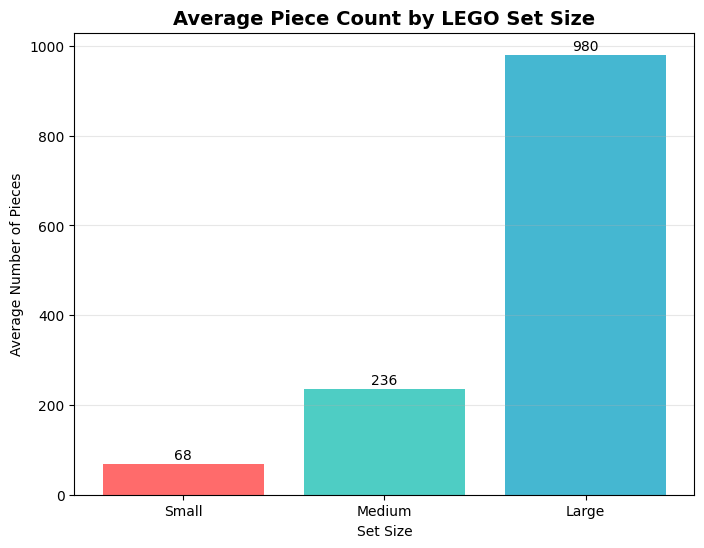

In [ ]:
# Step 6: Visualizations (matches your charts)
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['DejaVu Sans']  # Default font in Colab
plt.rcParams['axes.unicode_minus'] = False

sorted_sizes = ['Small', 'Medium', 'Large']

# Chart 1: Average Piece Count by Size
plt.figure(figsize=(8, 6))
piece_means = df_clean.groupby('size')['pieces'].mean().reindex(sorted_sizes)
bars = plt.bar(sorted_sizes, piece_means, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.title('Average Piece Count by LEGO Set Size', fontsize=14, fontweight='bold')
plt.xlabel('Set Size')
plt.ylabel('Average Number of Pieces')
# Add labels
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 10,
             f'{piece_means.iloc[i]:.0f}', ha='center')
plt.grid(axis='y', alpha=0.3)
plt.show()

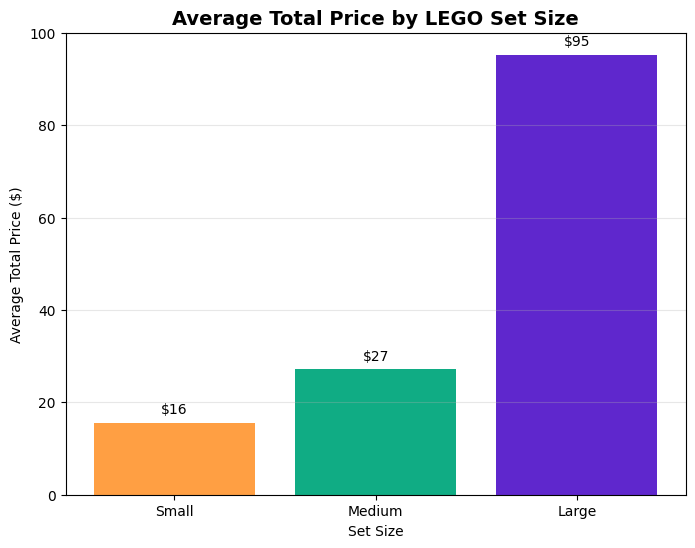

In [ ]:
# Chart 2: Average Total Price by Size
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['DejaVu Sans']  # Default font in Colab
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(8, 6))
price_means = df_clean.groupby('size')['price'].mean().reindex(sorted_sizes)
bars = plt.bar(sorted_sizes, price_means, color=['#FF9F43', '#10AC84', '#5F27CD'])
plt.title('Average Total Price by LEGO Set Size', fontsize=14, fontweight='bold')
plt.xlabel('Set Size')
plt.ylabel('Average Total Price ($)')
# Add labels
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 2,
             f'${price_means.iloc[i]:.0f}', ha='center')
plt.grid(axis='y', alpha=0.3)
plt.show()

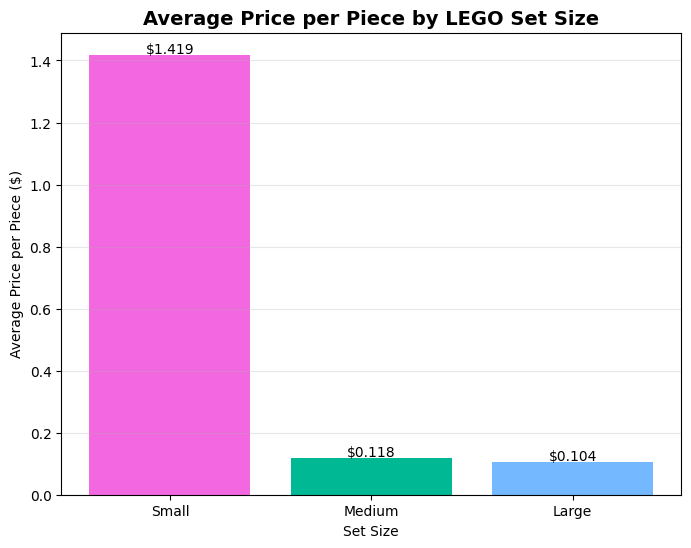

In [ ]:
# Chart 3: Average Price per Piece by Size
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['DejaVu Sans']  # Default font in Colab
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(8, 6))
ppp_means = df_clean.groupby('size')['price_per_piece'].mean().reindex(sorted_sizes)
bars = plt.bar(sorted_sizes, ppp_means, color=['#F368E0', '#00B894', '#74B9FF'])
plt.title('Average Price per Piece by LEGO Set Size', fontsize=14, fontweight='bold')
plt.xlabel('Set Size')
plt.ylabel('Average Price per Piece ($)')
# Add labels
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.005,
             f'${ppp_means.iloc[i]:.3f}', ha='center')
plt.grid(axis='y', alpha=0.3)
plt.show()

/tmp/ipython-input-556023452.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = plt.boxplot(size_price_data, labels=sorted_sizes, patch_artist=True)


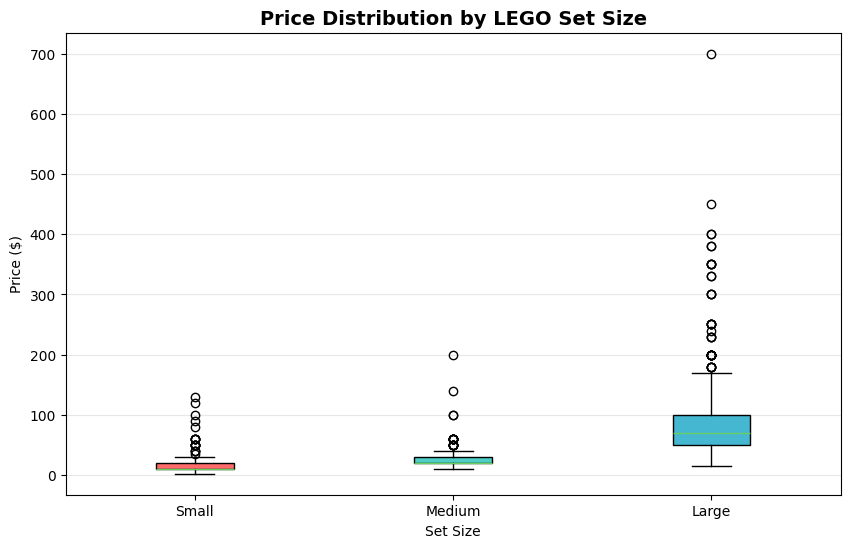

In [ ]:
# Chart 4: Price Distribution by Size (Box Plot)
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['DejaVu Sans']  # Default font in Colab
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 6))
size_price_data = [df_clean[df_clean['size']==s]['price'] for s in sorted_sizes]
boxplot = plt.boxplot(size_price_data, labels=sorted_sizes, patch_artist=True)
# Add colors
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
plt.title('Price Distribution by LEGO Set Size', fontsize=14, fontweight='bold')
plt.xlabel('Set Size')
plt.ylabel('Price ($)')
plt.grid(axis='y', alpha=0.3)
plt.show()